In [265]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle as pkl
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Data Exploration

In [221]:
df = pd.read_csv('../dados/HousePrices_HalfMil.csv')

In [222]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [223]:
df.shape

(500000, 16)

In [224]:
df.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [226]:
df.dtypes

Area             int64
Garage           int64
FirePlace        int64
Baths            int64
White Marble     int64
Black Marble     int64
Indian Marble    int64
Floors           int64
City             int64
Solar            int64
Electric         int64
Fiber            int64
Glass Doors      int64
Swiming Pool     int64
Garden           int64
Prices           int64
dtype: object

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


<Axes: >

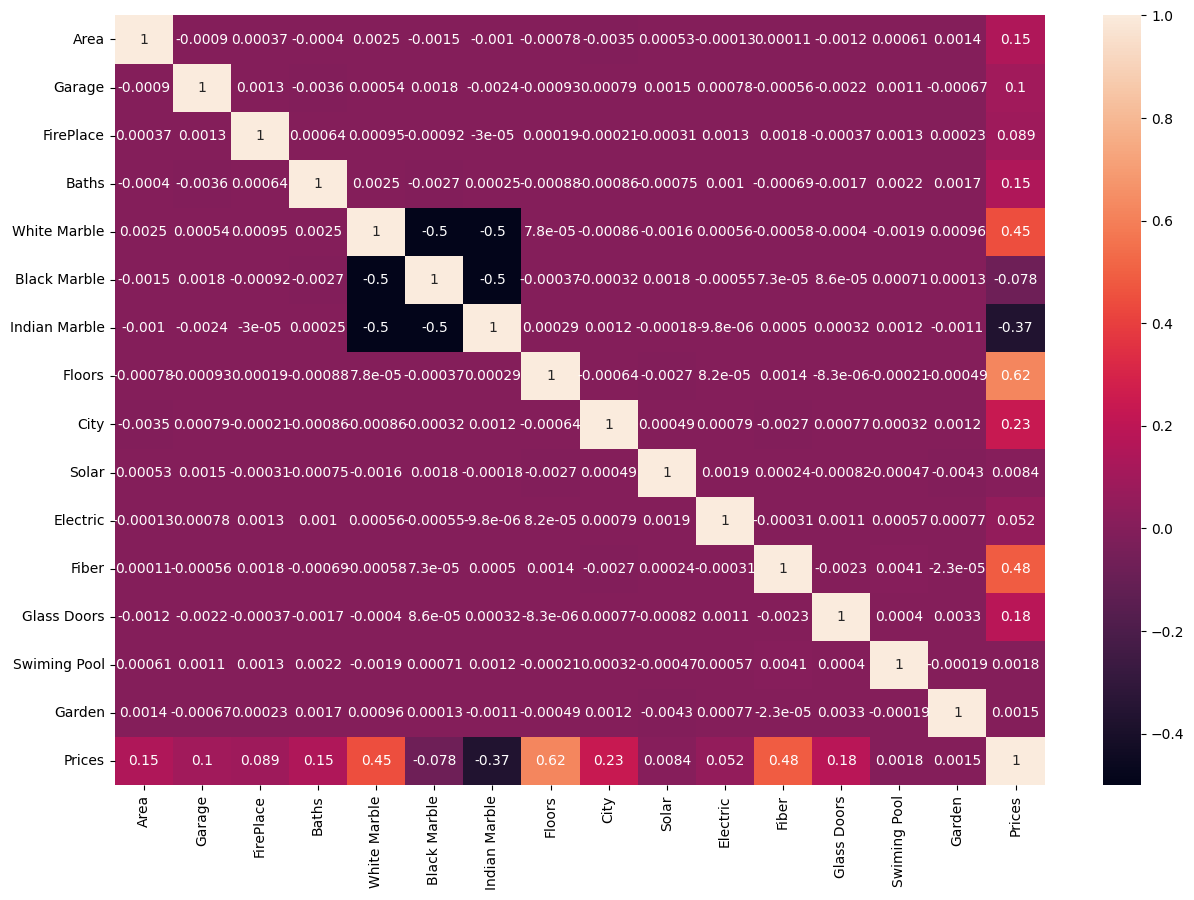

In [228]:
#correlacoes
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True)

<Axes: title={'center': 'Valor do Imóvel'}, ylabel='Valor em Reais'>

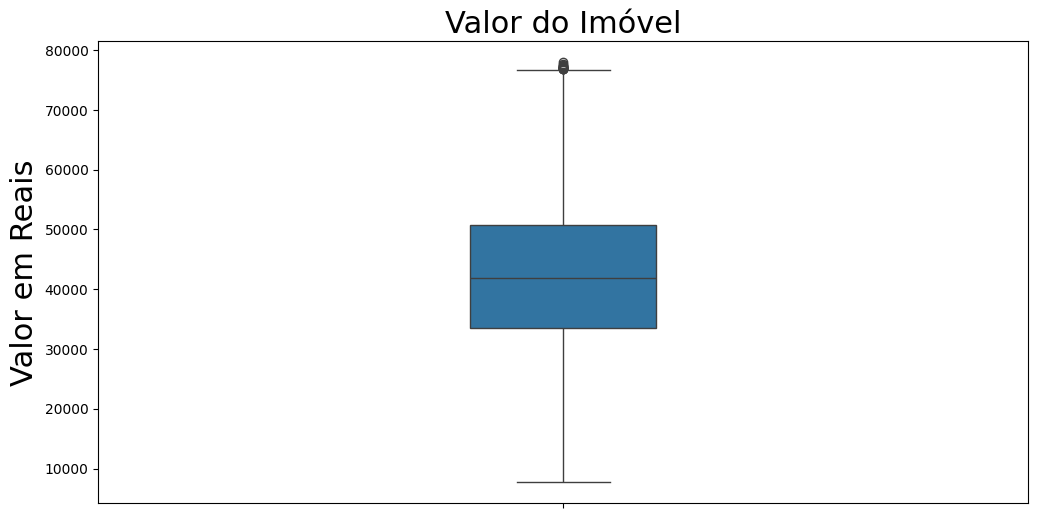

In [229]:
#check comportamento variavel target
ax = sns.boxplot(data=df["Prices"], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title("Valor do Imóvel", fontsize = 22)
ax.set_ylabel("Valor em Reais", fontsize = 22)
ax

### pre-processamento

In [230]:
df.dtypes

Area             int64
Garage           int64
FirePlace        int64
Baths            int64
White Marble     int64
Black Marble     int64
Indian Marble    int64
Floors           int64
City             int64
Solar            int64
Electric         int64
Fiber            int64
Glass Doors      int64
Swiming Pool     int64
Garden           int64
Prices           int64
dtype: object

In [232]:
#tipagem das colunas
for coluna in df.columns:

    df[coluna] = pd.to_numeric(df[coluna])

In [233]:
#funcao remover outliers (metodo IQR)
def remover_outliers(df):
    """
    Função para remover outliers
    
    Parâmetros:
    - df: DataFrame contendo os dados.
    
    Retorna:
    df (DataFrame): conjunto preprocessado sem outliers
    """
    for coluna in df.columns:
        
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtra os dados removendo os outliers
        df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

    return df

In [234]:
df = remover_outliers(df)

<Axes: title={'center': 'Valor do Imóvel'}, ylabel='Valor em Reais'>

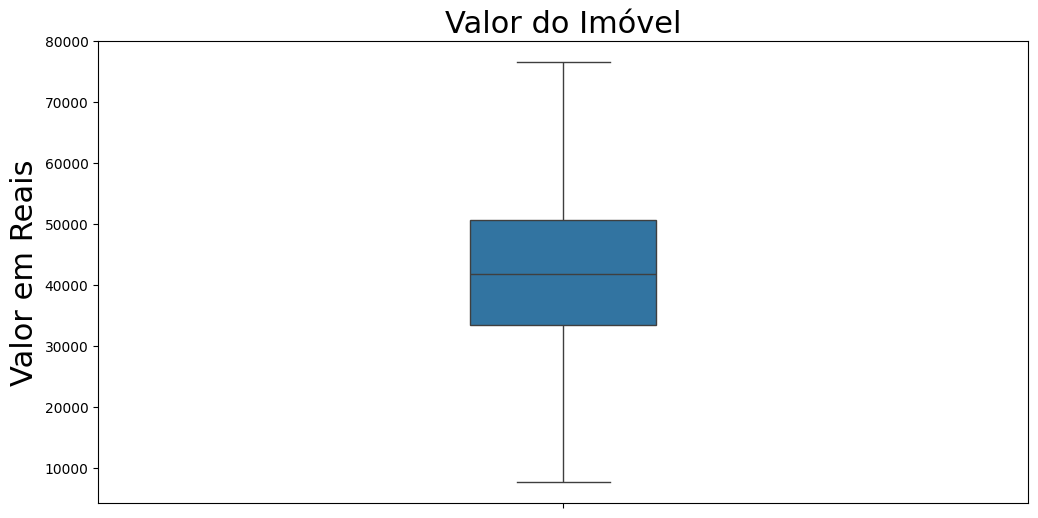

In [235]:
#recheck
ax = sns.boxplot(data=df["Prices"], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title("Valor do Imóvel", fontsize = 22)
ax.set_ylabel("Valor em Reais", fontsize = 22)
ax

In [236]:
#check de nulos
df.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [237]:
# verificando duplicatas completas (considerando todas as colunas)
duplicatas_completas = df.duplicated()

# total de duplicatas
num_duplicatas = duplicatas_completas.sum()

print(f"Número total de duplicatas (linhas idênticas): {num_duplicatas}")

# Exibir as duplicatas (se houver)
if num_duplicatas > 0:
    print("\nLinhas duplicadas:")
    print(df[duplicatas_completas])
    df = df.drop_duplicates()

Número total de duplicatas (linhas idênticas): 5693

Linhas duplicadas:
        Area  Garage  FirePlace  Baths  White Marble  Black Marble  \
4415     190       2          2      3             1             0   
6955      73       3          4      2             0             1   
8926     247       3          2      2             0             0   
9700     221       1          3      1             0             1   
10421     82       1          0      5             1             0   
...      ...     ...        ...    ...           ...           ...   
499867   219       2          0      1             0             0   
499912   240       1          1      4             0             1   
499946   211       1          4      1             0             1   
499964    38       2          0      5             1             0   
499978    40       1          4      3             1             0   

        Indian Marble  Floors  City  Solar  Electric  Fiber  Glass Doors  \
4415       

In [238]:
df.shape

(494291, 16)

In [239]:
#separando x e y
X = df.drop("Prices", axis=1)
y = df["Prices"]

In [240]:
#Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [241]:
print(f"shape de x_treino: {X_train.shape}\nShape de x_teste: {X_test.shape}")
print(f"shape de y_treino: {y_train.shape}\nShape de y_teste: {y_test.shape}")

shape de x_treino: (395432, 15)
Shape de x_teste: (98859, 15)
shape de y_treino: (395432,)
Shape de y_teste: (98859,)


In [242]:
# normalização das colunas

# colunas_a_normalizar = ['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble', 
#                         'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber', 
#                         'Glass Doors', 'Swiming Pool', 'Garden', 'Prices']

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# dados_normalizados = df.copy()  # Criar uma cópia para não alterar o original
# dados_normalizados[colunas_a_normalizar] = scaler.fit_transform(df[colunas_a_normalizar])

# Exibir os dados normalizados
#print(dados_normalizados)

In [243]:
X_train

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
255270,219,3,2,2,0,0,1,0,3,1,0,1,0,1,0
138574,45,3,0,5,0,1,0,1,3,0,1,1,1,0,1
100672,223,1,3,5,0,1,0,0,2,0,0,1,1,0,1
77278,143,2,2,5,0,0,1,1,2,1,1,1,1,1,0
305650,97,1,1,3,0,1,0,0,2,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260781,237,3,2,1,0,1,0,1,1,1,1,1,1,1,0
368966,1,1,1,3,0,0,1,1,2,0,1,0,0,1,0
132334,116,1,1,1,1,0,0,0,1,0,0,1,0,1,1
147376,104,2,2,1,0,1,0,1,1,1,0,0,1,0,1


In [244]:
X_test

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
200234,111,2,4,2,1,0,0,0,3,1,1,0,1,0,1
397175,18,1,0,3,0,0,1,1,2,1,1,0,0,1,0
445673,42,2,1,4,0,1,0,0,3,1,0,1,1,1,1
96358,26,3,3,5,0,0,1,0,1,0,1,0,1,0,1
207047,53,2,4,5,1,0,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295070,232,3,2,2,1,0,0,1,3,1,1,1,0,0,1
353565,118,1,3,2,1,0,0,1,2,1,0,0,0,0,0
333706,247,3,0,1,1,0,0,0,2,0,1,0,1,1,1
184157,43,3,1,5,0,1,0,1,1,0,0,1,1,0,0


In [245]:
pkl.dump(scaler, open("../modelo/modelo_scaler.pkl", "wb"))

### Treinamento, experimentação e métricas

In [246]:
modelo_LR = LinearRegression()

In [247]:
modelo_LR.fit(X_train_scaled, y_train)

LinearRegression()

In [250]:
y_predict_LR = modelo_LR.predict(X_test_scaled)

In [273]:
modelo_LR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [251]:
#metricas
print("Mean Absloute Error (MAE): ", round(mean_absolute_error(y_test,y_predict_LR),3))
print("Root Mean Squared Error (RMSE): ", round(np.sqrt(mean_squared_error(y_test,y_predict_LR)),3))
print("Root Mean Squared Log Error (RMSLE): ", round(np.log(np.sqrt(mean_squared_error(y_test,y_predict_LR))),3))
print("R2 Score: ", round(r2_score(y_test,y_predict_LR),6))

Mean Absloute Error (MAE):  0.0
Root Mean Squared Error (RMSE):  0.0
Root Mean Squared Log Error (RMSLE):  -25.145
R2 Score:  1.0


### Overfitting?

O modelo parece estar sofrendo overfitting, vamos fazer uns testes:

In [ ]:
#validacao cruzada avaliar a capacidade de generalização do modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_LR, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"MAE médio com validação cruzada: {-scores.mean()}")

MAE médio com validação cruzada: 5.5577249159423126e-11


In [254]:
print(y_train.describe())

count    395432.000000
mean      42044.599640
std       12106.909131
min        7725.000000
25%       33500.000000
50%       41850.000000
75%       50750.000000
max       76600.000000
Name: Prices, dtype: float64


In [257]:
#Teste no conjunto X_test para checar overfitting
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_test_pred = modelo_LR.predict(X_test)

# Calcular o MAE (Mean Absolute Error)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"MAE no conjunto de teste: {mae_test}")

# Calcular o RMSE (Root Mean Squared Error)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print(f"RMSE no conjunto de teste: {rmse_test}")

# Calcular o R² (coeficiente de determinação)
r2_test = r2_score(y_test, y_test_pred)
print(f"R² no conjunto de teste: {r2_test}")


MAE no conjunto de teste: 804627.5986506034
RMSE no conjunto de teste: 918495.729935859
R² no conjunto de teste: -5754.558994281707


/home/ayres/Documents/projects/case-boticario/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Parece que existe um problema de overfitting de fato. Podemos tentar otimizar hiperperametros, mas vamos testar outros algoritmos:

In [260]:
modelo_DTR = DecisionTreeRegressor(random_state=1)

In [261]:
modelo_DTR.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=1)

In [262]:
y_predict_DTR = modelo_DTR.predict(X_test_scaled)

In [263]:
#metricas
print("Mean Absloute Error (MAE): ", round(mean_absolute_error(y_test,y_predict_DTR),3))
print("Root Mean Squared Error (RMSE): ", round(np.sqrt(mean_squared_error(y_test,y_predict_DTR)),3))
print("Root Mean Squared Log Error (RMSLE): ", round(np.log(np.sqrt(mean_squared_error(y_test,y_predict_DTR))),3))
print("R2 Score: ", round(r2_score(y_test,y_predict_DTR),6))

Mean Absloute Error (MAE):  239.09
Root Mean Squared Error (RMSE):  332.903
Root Mean Squared Log Error (RMSLE):  5.808
R2 Score:  0.999244


In [264]:
#Teste no conjunto X_test para checar overfitting
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_test_pred = modelo_DTR.predict(X_test)

# Calcular o MAE (Mean Absolute Error)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"MAE no conjunto de teste: {mae_test}")

# Calcular o RMSE (Root Mean Squared Error)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print(f"RMSE no conjunto de teste: {rmse_test}")

# Calcular o R² (coeficiente de determinação)
r2_test = r2_score(y_test, y_test_pred)
print(f"R² no conjunto de teste: {r2_test}")


MAE no conjunto de teste: 11248.027999473998
RMSE no conjunto de teste: 11968.049626816224
R² no conjunto de teste: 0.022807805559779792


/home/ayres/Documents/projects/case-boticario/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [266]:
modelo_RFR = RandomForestRegressor(random_state=1)

In [267]:
modelo_RFR.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=1)

In [268]:
y_predict_RFR = modelo_RFR.predict(X_test_scaled)

In [269]:
#metricas
print("Mean Absloute Error (MAE): ", round(mean_absolute_error(y_test,y_predict_RFR),3))
print("Root Mean Squared Error (RMSE): ", round(np.sqrt(mean_squared_error(y_test,y_predict_RFR)),3))
print("Root Mean Squared Log Error (RMSLE): ", round(np.log(np.sqrt(mean_squared_error(y_test,y_predict_RFR))),3))
print("R2 Score: ", round(r2_score(y_test,y_predict_RFR),6))

Mean Absloute Error (MAE):  165.039
Root Mean Squared Error (RMSE):  214.861
Root Mean Squared Log Error (RMSLE):  5.37
R2 Score:  0.999685


In [270]:
#Teste no conjunto X_test para checar overfitting
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_test_pred = modelo_RFR.predict(X_test)

# Calcular o MAE (Mean Absolute Error)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"MAE no conjunto de teste: {mae_test}")

# Calcular o RMSE (Root Mean Squared Error)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print(f"RMSE no conjunto de teste: {rmse_test}")

# Calcular o R² (coeficiente de determinação)
r2_test = r2_score(y_test, y_test_pred)
print(f"R² no conjunto de teste: {r2_test}")


/home/ayres/Documents/projects/case-boticario/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


MAE no conjunto de teste: 11131.060786069047
RMSE no conjunto de teste: 11854.498981303977
R² no conjunto de teste: 0.041262678341434156


Apesar de alguma melhoria com outros algoritmos. Ainda parece que o modelo esta sofrendo de overfitting, vamos tentar<br>
otimizar hiperparametros

Linear Regression

In [271]:
# Definindo os hiperparâmetros para o Ridge
parameters = {
    'alpha': [0.1, 1, 10, 100]  # Regularização L2 (quanto maior o alpha, mais forte a regularização)
}

In [272]:
from sklearn.linear_model import Ridge, Lasso
# Modelo Ridge
ridge = Ridge()

# GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

print(f"Melhor parâmetro Ridge: {grid_search_ridge.best_params_}")
print(f"Melhor pontuação (negativo do MSE): {grid_search_ridge.best_score_}")

Melhor parâmetro Ridge: {'alpha': 0.1}
Melhor pontuação (negativo do MSE): -0.0001863560626355722


In [274]:
# Pegando o melhor modelo do GridSearch
best_ridge_model = grid_search_ridge.best_estimator_

# Realizando previsões no conjunto de teste
y_pred = best_ridge_model.predict(X_test)

# Calculando as métricas de avaliação no conjunto de teste
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados das métricas
print(f"Mean Absolute Error (MAE) no conjunto de teste: {mae}")
print(f"Root Mean Squared Error (RMSE) no conjunto de teste: {rmse}")
print(f"R² Score no conjunto de teste: {r2}")

Mean Absolute Error (MAE) no conjunto de teste: 0.009011060773320529
Root Mean Squared Error (RMSE) no conjunto de teste: 0.010926977130419896
R² Score no conjunto de teste: 0.9999999999991854
